# IMPORTING LIBS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# IMPORT DATASET

In [2]:
df = pd.read_csv("../data/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## SPLITING INTO X AND Y

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [16]:
print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(1760, 7)
(1760,)
(440,)


# TRAINING

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
pred = model.predict(X_test)

In [22]:
print(pred)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'blackgram' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'pigeonpeas' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 

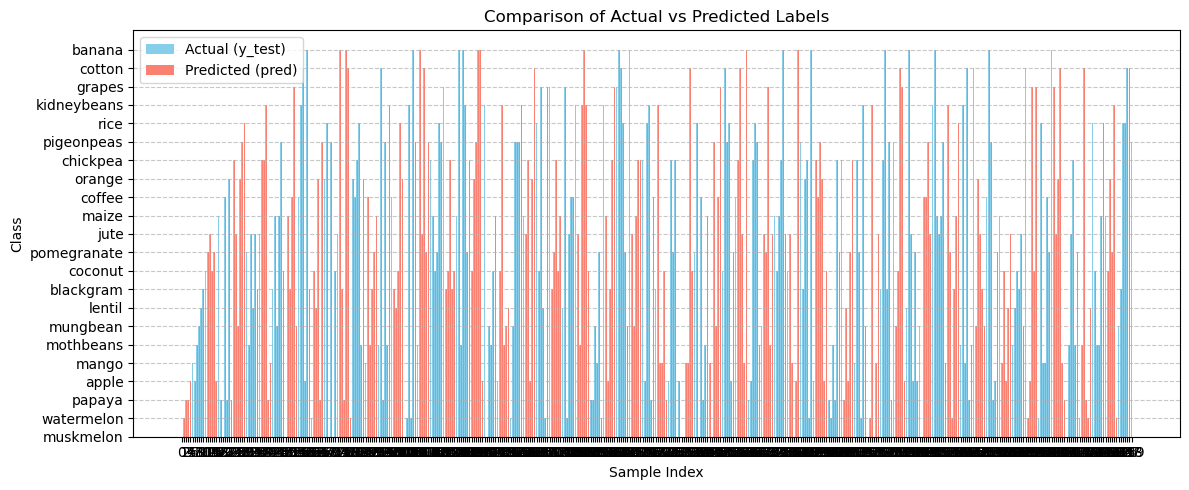

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure y_test and pred are 1D arrays or Series
y_test = y_test.to_numpy().ravel()
pred = pred.ravel()

# Sample indices
x = np.arange(len(y_test))

# Bar width
width = 0.4

# Create the bar chart
plt.figure(figsize=(12, 5))
plt.bar(x - width/2, y_test, width=width, label='Actual (y_test)', color='skyblue')
plt.bar(x + width/2, pred, width=width, label='Predicted (pred)', color='salmon')

# Labels and legend
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.title("Comparison of Actual vs Predicted Labels")
plt.xticks(ticks=x)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:
from sklearn.metrics import classification_report

# y_test: true labels
# pred: predicted labels
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

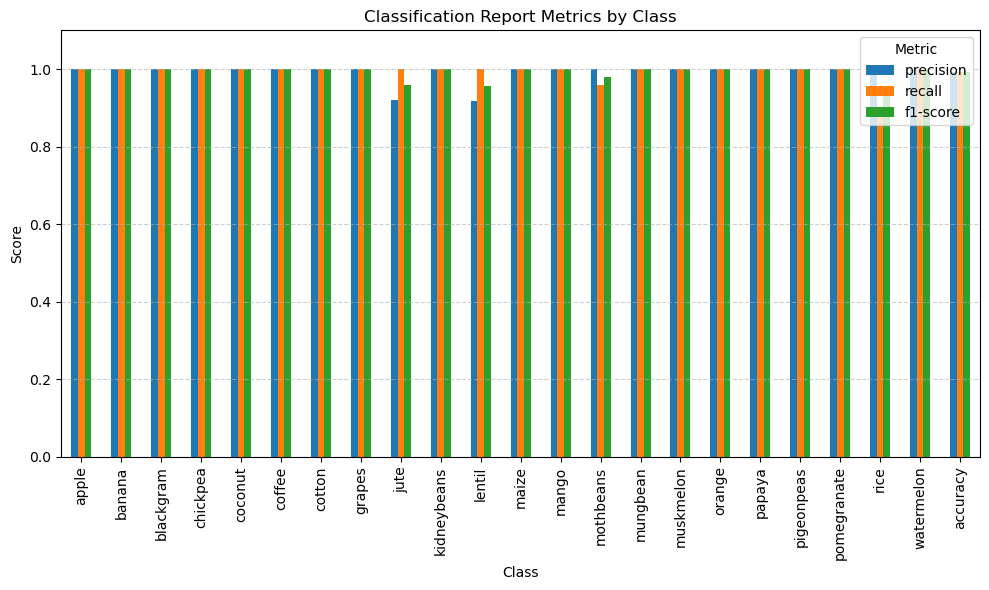

In [26]:
# Step 1: Generate classification report as dict
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# Step 2: Filter out the last rows (like 'accuracy')
metrics = ['precision', 'recall', 'f1-score']
df_filtered = df.loc[[label for label in df.index if label.isdigit() or label.isalpha()], metrics]

# Step 3: Plot bar chart
df_filtered.plot(kind='bar', figsize=(10, 6))
plt.title("Classification Report Metrics by Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [27]:
new_features = [[36,38,25, 28.66024, 59.31891, 8.399136, 36.9263]]

In [28]:
predict_new_feature = model.predict(new_features)

c:\Users\HP\Documents\DS\sample_projects\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
predict_new_feature

array(['mothbeans'], dtype=object)

In [32]:
import pickle 
with open("../model/model.pkl", "wb") as file : 
    pickle.dump(model, file)